
# Project Title: Data Analysis and Modeling Project

## Overview
This project demonstrates an end-to-end workflow for analyzing a dataset, performing exploratory data analysis (EDA), 
engineering features, building models, and drawing insights. The goal is to showcase a structured and methodical 
approach to solving real-world data challenges.

### Steps Included:
1. Data Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building and Evaluation
5. Results and Conclusions


## Data Preprocessing

In [1]:
# Data Cleaning and Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'shopping_trends 2.csv'
df = pd.read_csv(file_path)

# Checking for missing values
missing_values = df.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Dropping duplicates if any
df_cleaned = df.drop_duplicates()

# Check if we removed any duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

# Removing any columns that are not useful for analysis
# From the dataset, columns like 'Promo Code Used' and 'Subscription Status' might not be relevant for a general analysis.
df_cleaned = df_cleaned.drop(columns=['Promo Code Used', 'Subscription Status'])

# Check for inconsistent data types
print("Data types after dropping columns:")
print(df_cleaned.dtypes)

# Convert the categorical data columns to appropriate types
categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method', 'Frequency of Purchases']
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Converting Review Rating to numeric, ensuring it is float for statistical analysis
df_cleaned['Review Rating'] = pd.to_numeric(df_cleaned['Review Rating'], errors='coerce')

# Checking if there are any erroneous values in 'Purchase Amount (USD)'
# Removing negative values if any as these would be invalid
df_cleaned = df_cleaned[df_cleaned['Purchase Amount (USD)'] > 0]

# Check final cleaned dataset
print("Cleaned Dataset Info:")
print(df_cleaned.info())

# Display the cleaned dataset's first few rows
df_cleaned.head()

Missing Values in Each Column:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Number of rows after removing duplicates: 3900
Data types after dropping columns:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color           

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,Yes,31,PayPal,Annually


## Exploratory Data Analysis (EDA)

Summary Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


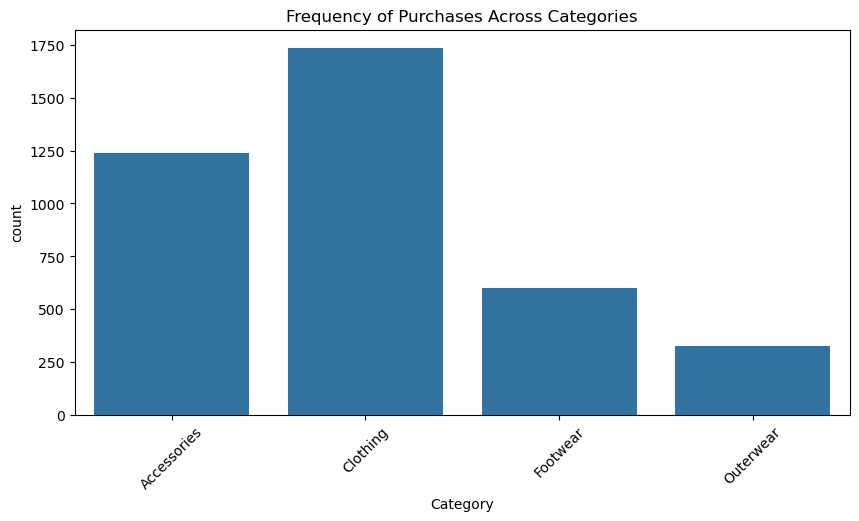

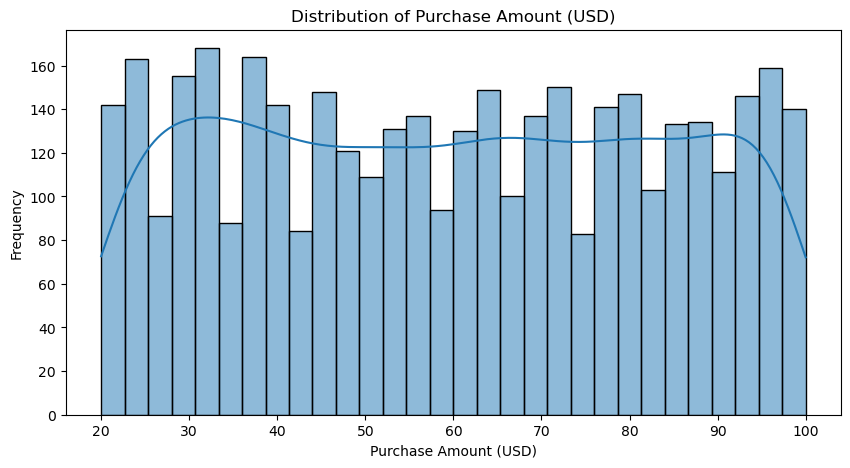

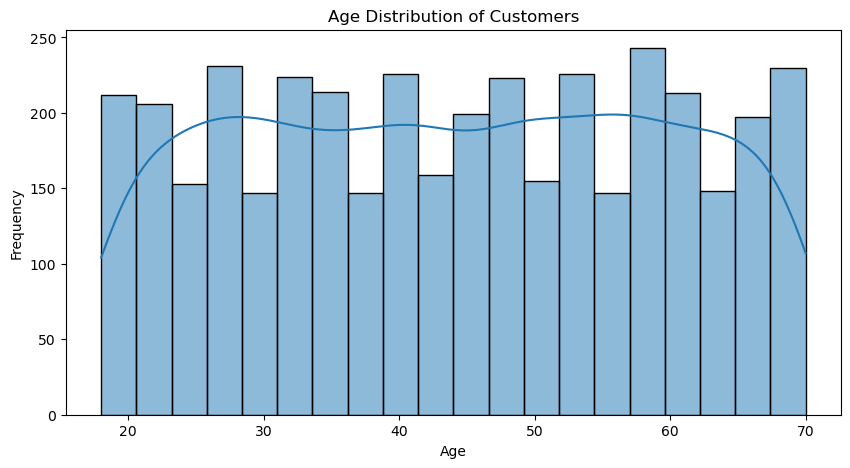

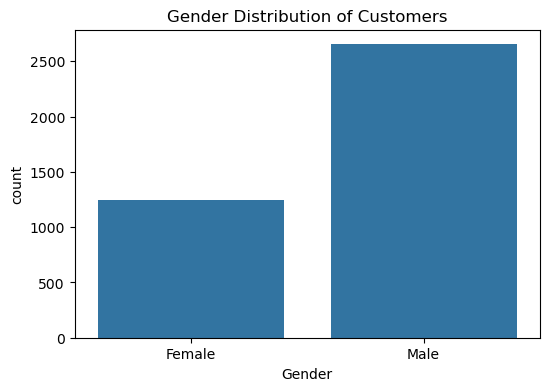

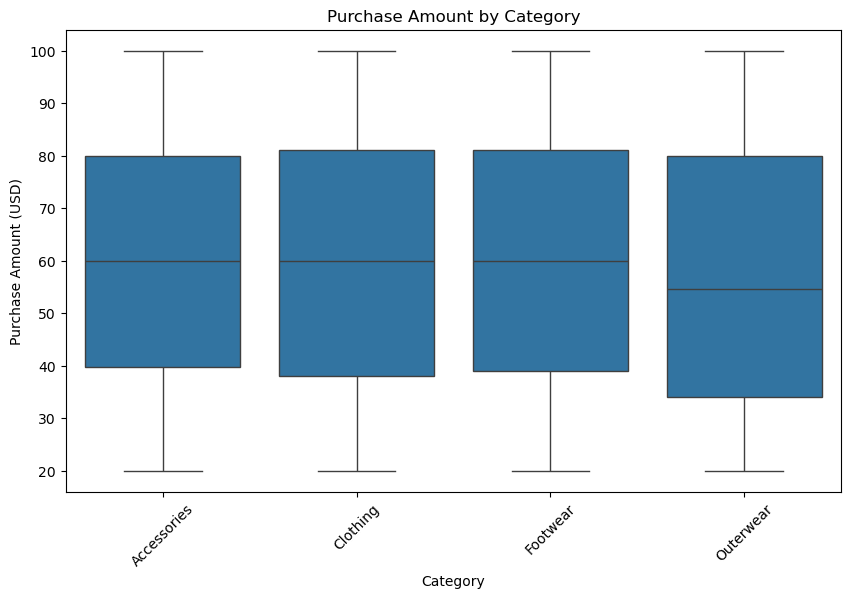

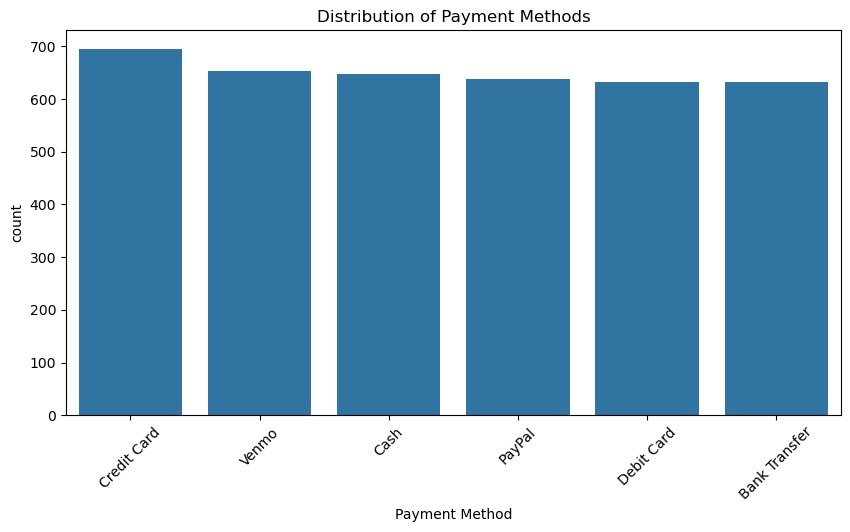

In [2]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print("Summary Statistics:")
print(df_cleaned.describe())

# Frequency of purchases across different categories
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df_cleaned)
plt.title('Frequency of Purchases Across Categories')
plt.xticks(rotation=45)
plt.show()

# Distribution of Purchase Amount
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Purchase Amount (USD)'], kde=True, bins=30)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Analyzing Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Age'], kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution of Customers')
plt.show()

# Purchase Amount by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df_cleaned)
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()

# Purchase Patterns by Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment Method', data=df_cleaned, order=df_cleaned['Payment Method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)
plt.show()


## Feature Engineering

In [4]:
# Feature Engineering

import numpy as np

# Creating a feature for the average purchase amount per customer
df_cleaned['Avg_Purchase_Amount'] = df_cleaned.groupby('Customer ID')['Purchase Amount (USD)'].transform('mean')

# Creating a feature for the total number of purchases made by each customer
df_cleaned['Total_Purchases'] = df_cleaned.groupby('Customer ID')['Purchase Amount (USD)'].transform('count')

# Creating a feature to identify high-value customers
# Assuming high-value customers are those whose average purchase amount is greater than a certain threshold (e.g., $75)
df_cleaned['High_Value_Customer'] = np.where(df_cleaned['Avg_Purchase_Amount'] > 75, 'Yes', 'No')

# Creating a feature for the recency of purchase (days since last purchase)
df_cleaned['Purchase_Date'] = pd.to_datetime(df_cleaned['Season'].map({'Winter': '2024-01-01', 'Spring': '2024-04-01', 'Summer': '2024-07-01', 'Fall': '2024-10-01'}))
current_date = pd.to_datetime('2024-12-31')
df_cleaned['Days_Since_Last_Purchase'] = (current_date - df_cleaned['Purchase_Date'].astype('datetime64[ns]')).dt.days

# Creating a feature for discount usage
# Assuming customers who frequently use discounts are tagged as 'Frequent_Discount_Users'
df_cleaned['Frequent_Discount_User'] = df_cleaned.groupby('Customer ID')['Discount Applied'].transform(lambda x: 'Yes' if (x == 'Yes').mean() > 0.5 else 'No')

# Creating a feature for purchase frequency category
def categorize_frequency(freq):
    if freq == 'Weekly':
        return 'High'
    elif freq == 'Fortnightly':
        return 'Medium'
    elif freq == 'Monthly':
        return 'Low'
    else:
        return 'Very Low'

df_cleaned['Purchase_Frequency_Category'] = df_cleaned['Frequency of Purchases'].apply(categorize_frequency)

# Check the dataset after feature engineering
print("Dataset after Feature Engineering:")
print(df_cleaned.head())

Dataset after Feature Engineering:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Previous Purchases  \
0       Kentucky    L       Gray  Winter  ...                  14   
1          Maine    L     Maroon  Winter  ...                   2   
2  Massachusetts    S     Maroon  Spring  ...                  23   
3   Rhode Island    M     Maroon  Spring  ...                  49   
4         Oregon    M  Turquoise  Spring  ...                  31   

  Preferred Payment Method Frequency of Purchases Avg_Purchase_Amount  \
0       

## # Statistical Analysis and Insights


Correlation Analysis:
Purchase Amount (USD)       1.000000
Avg_Purchase_Amount         1.000000
Review Rating               0.030776
Customer ID                 0.011048
Previous Purchases          0.008063
Age                        -0.010424
Days_Since_Last_Purchase   -0.015851
Total_Purchases                  NaN
Name: Purchase Amount (USD), dtype: float64


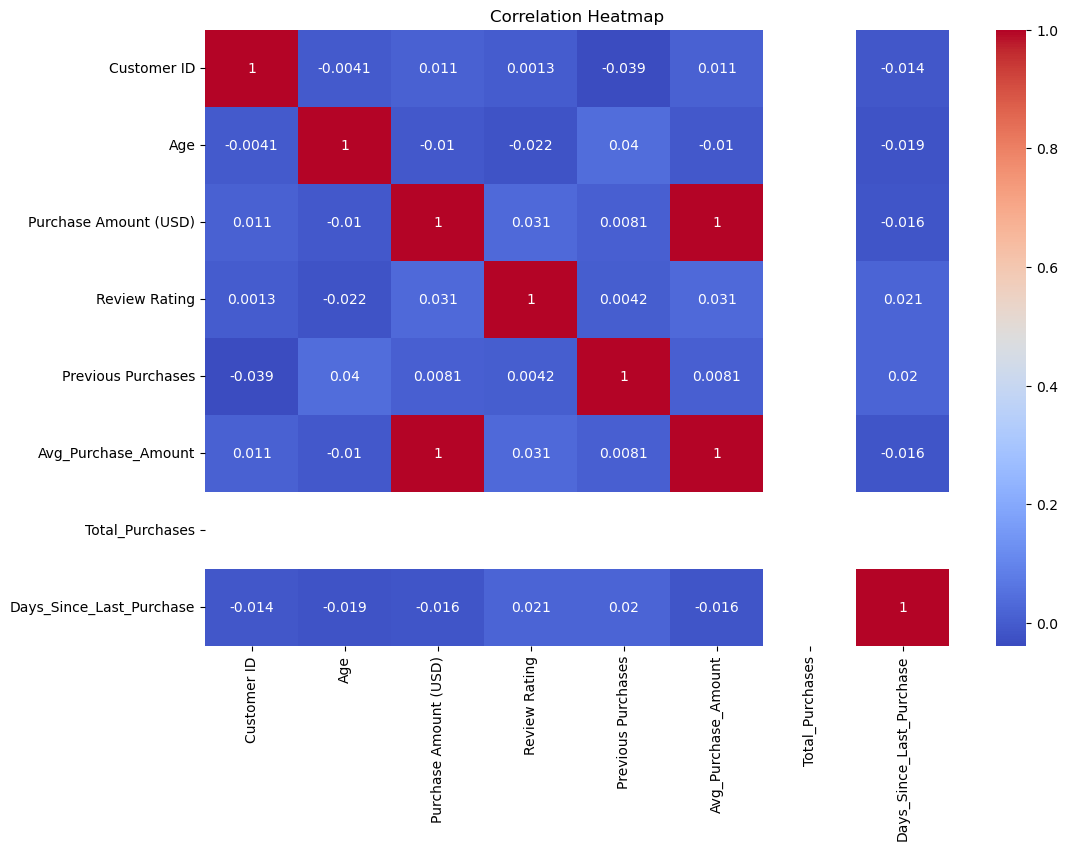


Average Purchase Amount by Gender:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


/var/folders/g8/424wlxgn57zb91xww9gxwtbr0000gn/T/ipykernel_94963/4208727831.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_purchase_avg = df_cleaned.groupby('Gender')['Purchase Amount (USD)'].mean()


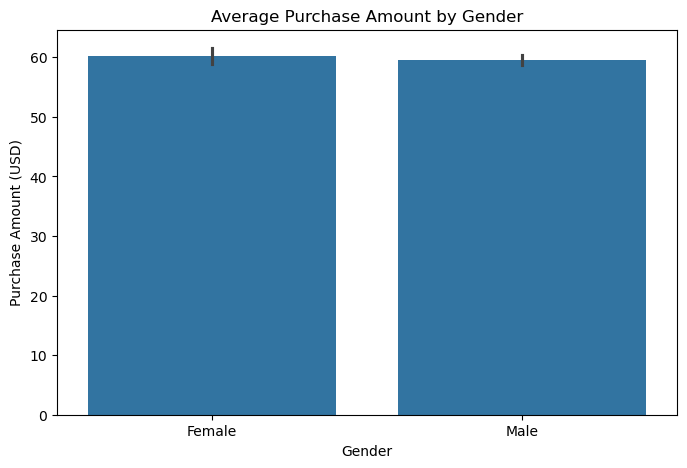


T-test for High vs Low Value Customers:
T-statistic: 109.62195103054849, P-value: 0.0

Chi-Square Test for Discount Usage vs High Value Customers:
Chi-square Statistic: 0.540042675675526, P-value: 0.46241504080697027

Average Purchase Amount by Age Group:
Age_Group
<18      59.985507
18-35    60.155145
35-50    59.072007
50-65    60.281891
65+      58.884507
Name: Purchase Amount (USD), dtype: float64


/var/folders/g8/424wlxgn57zb91xww9gxwtbr0000gn/T/ipykernel_94963/4208727831.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchase_avg = df_cleaned.groupby('Age_Group')['Purchase Amount (USD)'].mean()


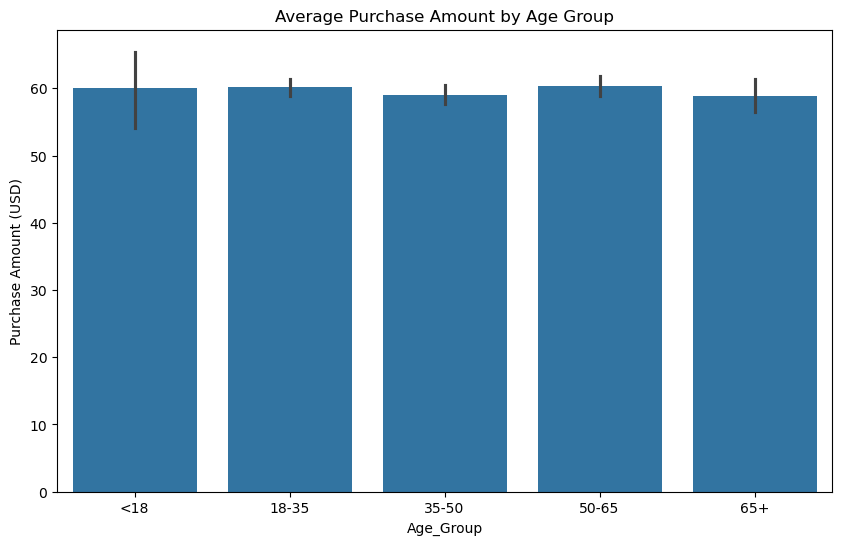

/var/folders/g8/424wlxgn57zb91xww9gxwtbr0000gn/T/ipykernel_94963/4208727831.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df_cleaned.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)


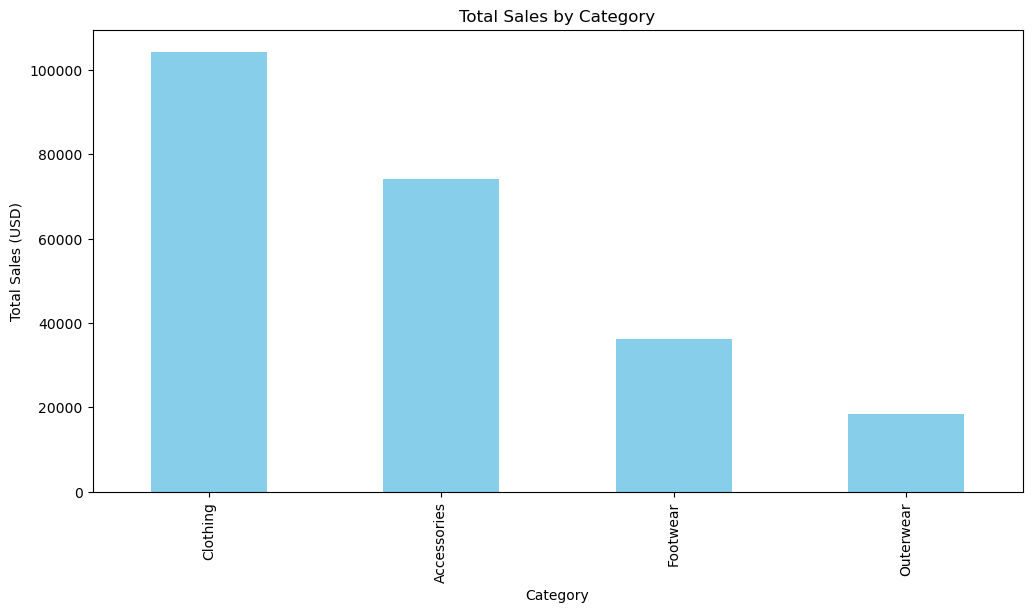

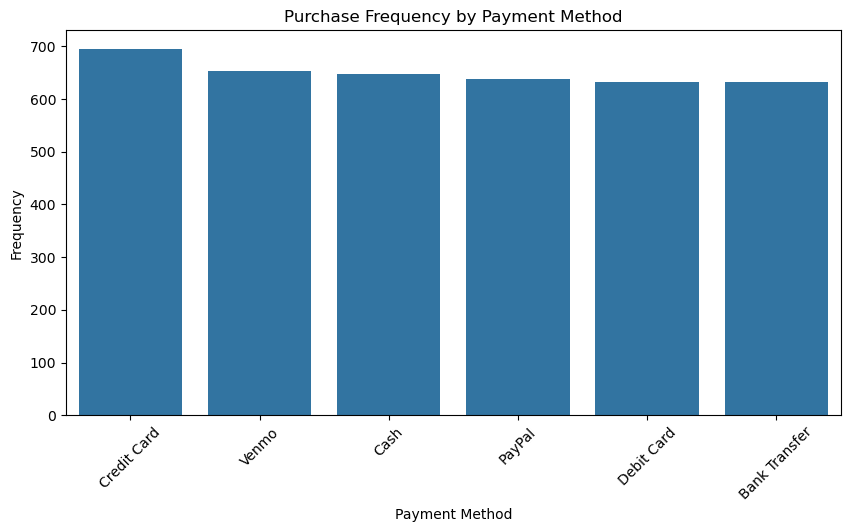

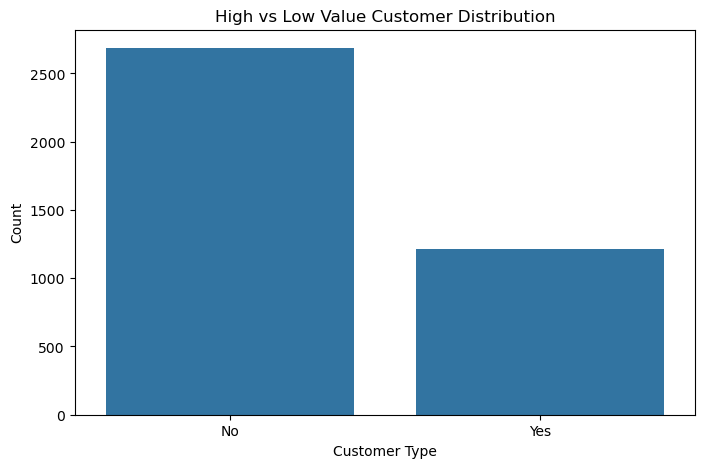

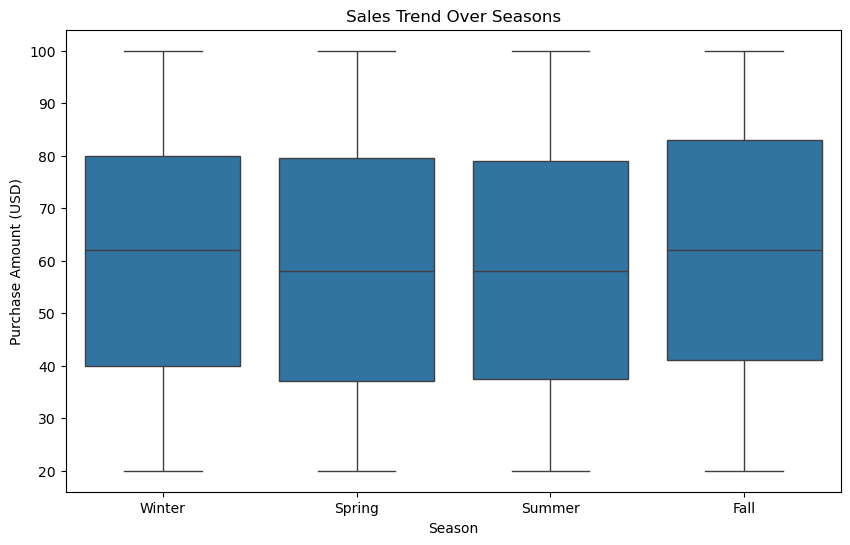

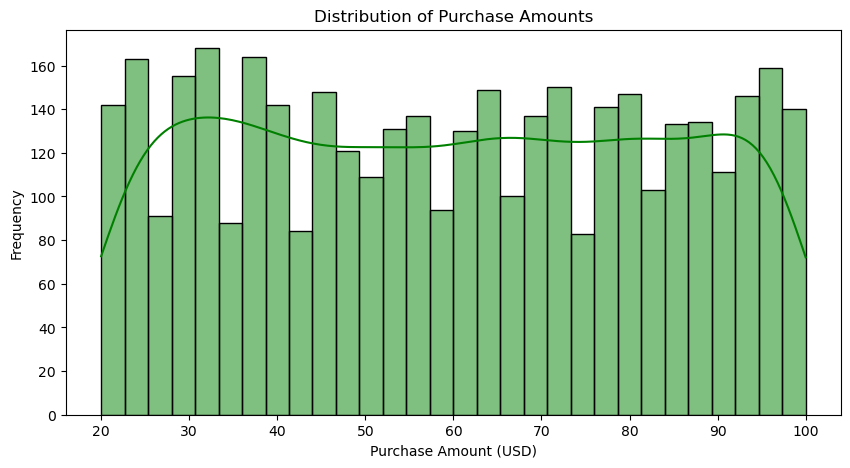

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = df_cleaned.select_dtypes(include=['number']).corr()
print(correlation_matrix['Purchase Amount (USD)'].sort_values(ascending=False))

# Visualizing correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analysis of Purchase Amount by Gender
print("\nAverage Purchase Amount by Gender:")
gender_purchase_avg = df_cleaned.groupby('Gender')['Purchase Amount (USD)'].mean()
print(gender_purchase_avg)

# Visualizing Purchase Amount by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df_cleaned, estimator=np.mean)
plt.title('Average Purchase Amount by Gender')
plt.show()

# T-test for High vs Low Value Customers
high_value = df_cleaned[df_cleaned['High_Value_Customer'] == 'Yes']['Purchase Amount (USD)']
low_value = df_cleaned[df_cleaned['High_Value_Customer'] == 'No']['Purchase Amount (USD)']

t_stat, p_value = stats.ttest_ind(high_value, low_value, equal_var=False)
print("\nT-test for High vs Low Value Customers:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Chi-Square Test for Discount Usage vs High Value Customers
contingency_table = pd.crosstab(df_cleaned['High_Value_Customer'], df_cleaned['Frequent_Discount_User'])
chi2, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test for Discount Usage vs High Value Customers:")
print(f"Chi-square Statistic: {chi2}, P-value: {chi2_p}")

# Insights based on Age Groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels)

# Average Purchase Amount by Age Group
print("\nAverage Purchase Amount by Age Group:")
age_group_purchase_avg = df_cleaned.groupby('Age_Group')['Purchase Amount (USD)'].mean()
print(age_group_purchase_avg)

# Visualizing Purchase Amount by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Purchase Amount (USD)', data=df_cleaned, estimator=np.mean)
plt.title('Average Purchase Amount by Age Group')
plt.show()

# Total Sales by Category
plt.figure(figsize=(12, 6))
category_sales = df_cleaned.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

# Purchase Frequency by Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment Method', data=df_cleaned, order=df_cleaned['Payment Method'].value_counts().index)
plt.title('Purchase Frequency by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# High vs Low Value Customer Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='High_Value_Customer', data=df_cleaned)
plt.title('High vs Low Value Customer Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

# Sales Trend Over Seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df_cleaned, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Sales Trend Over Seasons')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Distribution of Purchase Amounts
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Purchase Amount (USD)'], kde=True, bins=30, color='green')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

#

## Results and Conclusions

In [9]:
print("\nSummary and Business Recommendations:")
print("1. Target High-Value Customers: The significant difference between high and low-value customers emphasizes the need for businesses to cultivate relationships with high-value customers through loyalty programs or exclusive offers.")
print("2. Seasonal Campaign Planning: Since Spring and Fall are peak seasons, businesses should plan promotions, inventory, and marketing efforts accordingly to maximize sales.")
print("3. Age-Specific Marketing Strategies: Given that middle-aged customers are the most lucrative group, businesses could create premium offerings targeting this demographic, while also appealing to younger customers with trendy and affordable product options.")
print("4. Payment Method Optimization: Considering that Credit Card is the preferred payment method, businesses should ensure that their payment systems are seamless and secure, encouraging customers to complete their purchases without friction.")

print("\nFinal Thoughts")
print("Data-driven insights provide an edge in understanding customer behavior and tailoring business strategies. This analysis sheds light on valuable customer segments, seasonal trends, and spending patterns that can inform both short-term campaigns and long-term strategic initiatives. With a well-informed approach, businesses can not only boost revenue but also create a more personalized and satisfying shopping experience for their customers.")



Summary and Business Recommendations:
1. Target High-Value Customers: The significant difference between high and low-value customers emphasizes the need for businesses to cultivate relationships with high-value customers through loyalty programs or exclusive offers.
2. Seasonal Campaign Planning: Since Spring and Fall are peak seasons, businesses should plan promotions, inventory, and marketing efforts accordingly to maximize sales.
3. Age-Specific Marketing Strategies: Given that middle-aged customers are the most lucrative group, businesses could create premium offerings targeting this demographic, while also appealing to younger customers with trendy and affordable product options.
4. Payment Method Optimization: Considering that Credit Card is the preferred payment method, businesses should ensure that their payment systems are seamless and secure, encouraging customers to complete their purchases without friction.

Final Thoughts
Data-driven insights provide an edge in understan